In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import os
import requests as rq
from io import BytesIO
from sqlalchemy import create_engine
import numpy as np
import scipy.stats as st
import json as json
%matplotlib notebook

In [3]:
csv_path = os.path.join('Ukraine_Black_Sea_2020_2022_Mar25.csv')
with open(csv_path) as csvfile:
    Ukraine_original_df = pd.read_csv(csv_path, header=[0])
    Ukraine_original_df =pd.DataFrame(Ukraine_original_df)
    #Ukraine_original_df = Ukraine_original_df.set_index('EVENT_ID_CNTY')

FileNotFoundError: [Errno 2] No such file or directory: 'Ukraine_Black_Sea_2020_2022_Mar25.csv'

In [9]:
csv_path = os.path.join('Civilian casualties per day.csv')
with open(csv_path) as csvfile:
    daily_casualties_df = pd.read_csv(csv_path, header=[0])
    daily_casualties_df =pd.DataFrame(daily_casualties_df)
    #Ukraine_original_df = Ukraine_original_df.set_index('EVENT_ID_CNTY')
daily_casualties_df

,day_of_the_war,Date,Daily Killed,Daily Wounded
0,3,26-Feb,64,176
1,4,27-Feb,38,128
2,5,28-Feb,40,104
3,6,1-Mar,85,117
4,7,2-Mar,22,28
5,8,3-Mar,82,122
6,9,4-Mar,20,32
7,10,5-Mar,13,52
8,11,6-Mar,42,42
9,12,7-Mar,68,60


In [10]:
drop_date_df = daily_casualties_df.drop(labels='Date', axis=1)
casualties_df=drop_date_df.set_index('day_of_the_war')
casualties_df

,Daily Killed,Daily Wounded
day_of_the_war,,
3,64,176
4,38,128
5,40,104
6,85,117
7,22,28
8,82,122
9,20,32
10,13,52
11,42,42


<IPython.core.display.Javascript object>


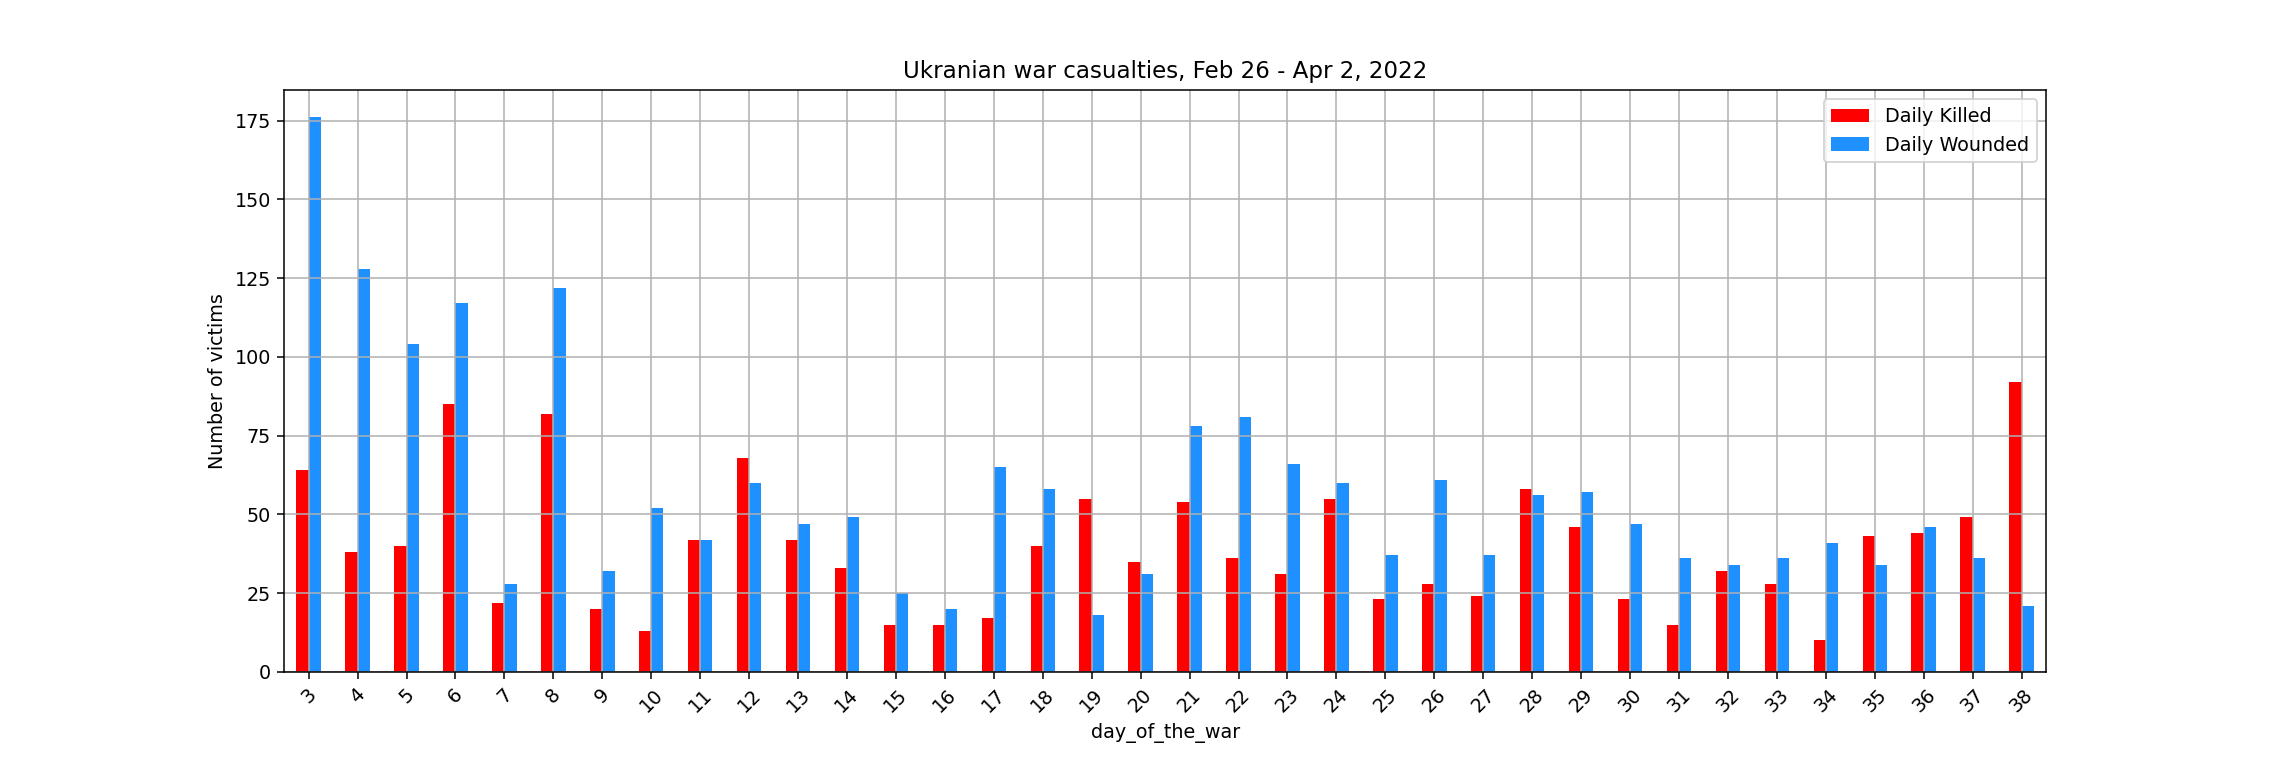

<function matplotlib.pyplot.show(block=None)>

In [11]:
colors = ["red", "dodgerblue"]
color = colors

# Create a list indicating where to write x labels and set figure size to adjust for space
multi_plot = casualties_df.plot(kind="bar", figsize=(12,4), title="Ukranian war casualties, Feb 26 - Apr 2, 2022", color=color)
plt.xticks(rotation = 45)
plt.ylabel("Number of victims")
plt.grid()

plt.savefig('war casualties')
plt.show

In [6]:
csv_path = os.path.join('Loss_of_property.csv')
with open(csv_path) as csvfile:
    property_loss_df = pd.read_csv(csv_path, header=[0])
    property_loss_df =pd.DataFrame(property_loss_df)
    #Ukraine_original_df = Ukraine_original_df.set_index('EVENT_ID_CNTY')
property_loss_df

,Target,Number
0,Residential,4431
1,Factories & warehouses,92
2,Schools,378
3,Hospitals,138
4,Airports,12
5,Power plants,7


In [7]:
property_loss_df.dtypes


Target    object
Number     int64
dtype: object

In [70]:
csv_path = os.path.join('Loss_of_property.csv')
with open(csv_path) as csvfile:
    property_loss_df = pd.read_csv(csv_path, header=[0])
    property_loss_df =pd.DataFrame(property_loss_df)
property_loss_df

,Target,Number
0,Residential,4431
1,Factories & warehouses,92
2,Schools,378
3,Hospitals,138
4,Airports,12
5,Power plants,7


<IPython.core.display.Javascript object>


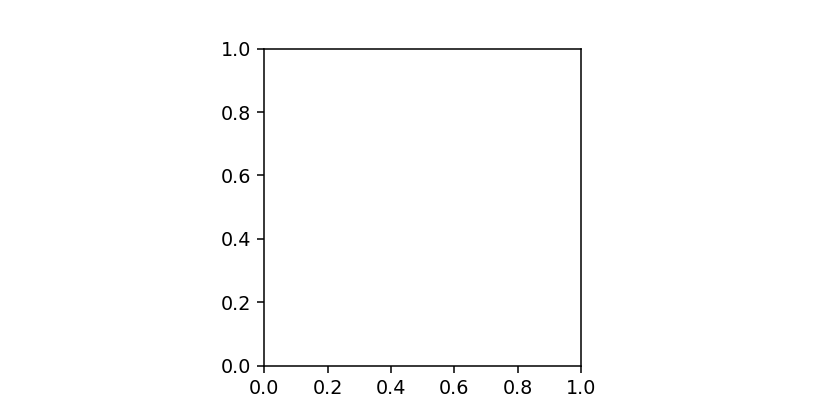

NameError: name 'data' is not defined

In [12]:
fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

Target = ["Residential Buildings - 4,431",
          "Factories & Warehouses - 92",
          "Schools - 378",
          "Hospitals - 138",
          "Airports - 12",
          "Power/hydroelectric plants - 7"]

Number = [4431, 92, 378, 138, 12, 7]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(Target[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
    

ax.set_title("Number of targets lost")

plt.savefig('targets lost')
plt.show()

In [13]:
csv_path = os.path.join('Ukranian Refugees.csv')
with open(csv_path) as csvfile:
    refugees_df = pd.read_csv(csv_path, header=[0])
    refugees_df =pd.DataFrame(refugees_df)
refugees_df

,Country,Number of refugees
0,Poland,2429
1,Romania,636
2,Moldova,393
3,Hungary,386
4,Slovakia,298


<IPython.core.display.Javascript object>


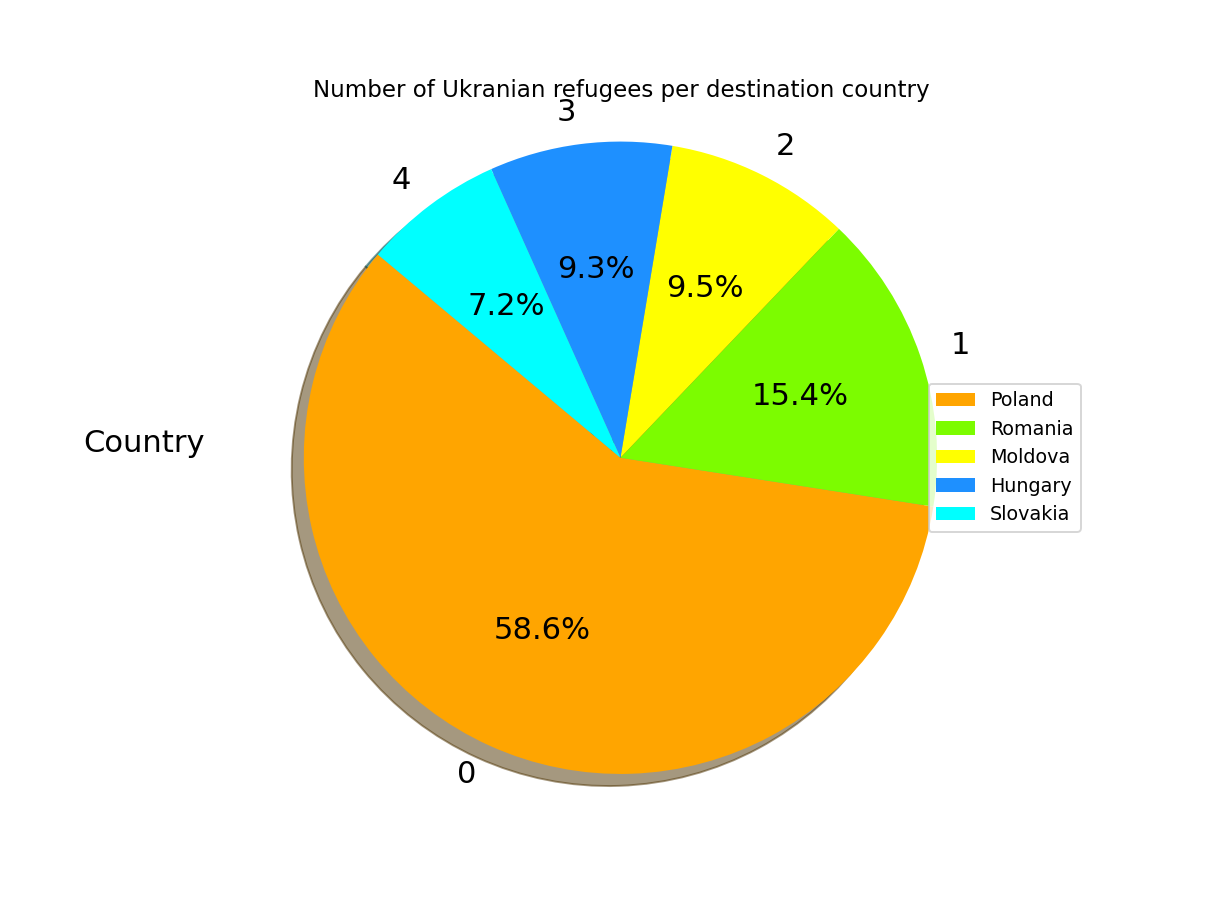

In [16]:
# Generate a bar plot showing the total number of refugees for country using Pandas
# Create a pie chart based on refugees_df
refugees_df.plot(kind='pie', y='Number of refugees', 
                        title="Number of Ukranian refugees per destination country",startangle=140,\
                        autopct='%1.1f%%',shadow=True, fontsize=16, colors =["orange", "lawngreen", "yellow", "dodgerblue", "cyan", "red"],legend =True)
# Make the axis equal to avoid plotting an egg shaped pie chart
labels = ['Poland','Romania','Moldova','Hungary', 'Slovakia']
plt.legend( loc = 'right', labels=labels)
plt.axis("equal")
plt.ylabel("Country", rotation= 0, fontsize=16)

plt.savefig('Ukranian refugees')
plt.show()

<IPython.core.display.Javascript object>


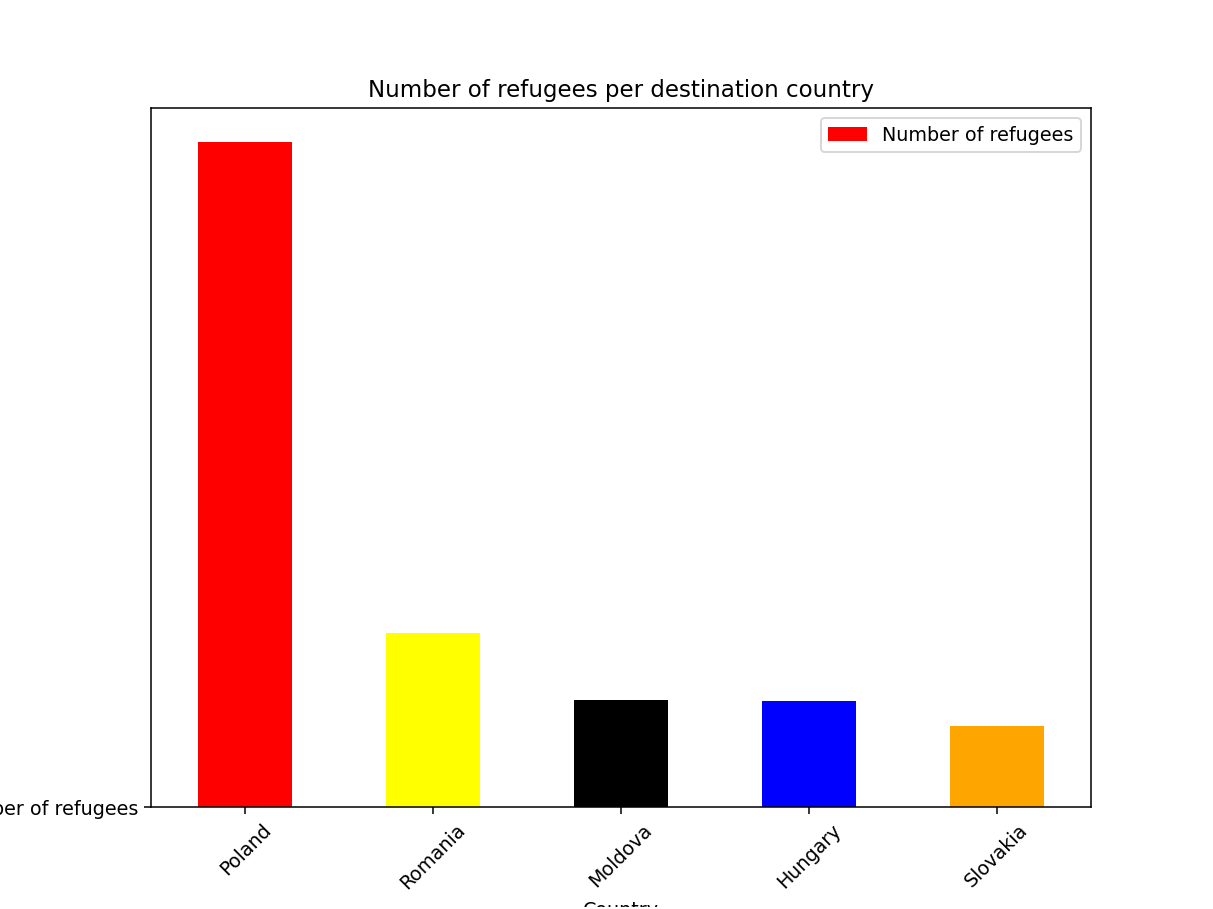

In [20]:
x ='Country'
y='Number of refugees'

refugees_df.plot(x ='Country', y='Number of refugees', kind = 'bar', color=colors)

plt.title('Number of refugees per destination country')
plt.ylabel('Country')
colors = ['red', 'yellow', 'black', 'blue', 'orange']
plt.bar(x, height = y, color = colors)
plt.xticks(rotation=45)
# Creating legend with color box

plt.savefig('Number of refugees')
plt.show()